In [1]:
try:
  from torchinfo import summary
except:
  !pip install torchinfo
  from torchinfo import summary

import os
from pathlib import Path
import requests

import random

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

In [2]:
# import modules
directory = Path("modules")

if not os.path.exists(directory):
  os.makedirs(directory)

download_modules = {
    "bigram_model.py":"https://raw.githubusercontent.com/Q-b1t/htbml/main/ML_ON_THE_RESCUE/architecture.py",
    "bigram_model.pt":"https://github.com/Q-b1t/htbml/raw/main/ML_ON_THE_RESCUE/bigram_model.pt",
}

file_paths = dict()

for module,raw in download_modules.items():
  module_path = directory / module
  file_paths[module] = module_path  
  if(module_path.exists()):
    print(f"[INFO]: Module: {module_path} already exists. Skipping...")
  else:
    print(f"[INFO]: Downloading {module}")
    request = requests.get(raw)
    with open(module_path,"wb") as f:
      f.write(request.content)



[INFO]: Module: modules/bigram_model.py already exists. Skipping...
[INFO]: Module: modules/bigram_model.pt already exists. Skipping...


In [3]:
# import the model
from modules.bigram_model import BigramLanguageModel, vocab

In [4]:
model_weights = file_paths["bigram_model.pt"]

In [5]:
vocabulary = vocab
vocab_size = len(vocabulary)

In [6]:
# instance the model
bigram_architecture = BigramLanguageModel(vocab_size)
bigram_architecture.load_state_dict(torch.load(f = model_weights))

<All keys matched successfully>

In [7]:
bigram_architecture

BigramLanguageModel(
  (token_embedding_table): Embedding(93, 93)
)

In [8]:
summary(bigram_architecture)

Layer (type:depth-idx)                   Param #
BigramLanguageModel                      --
├─Embedding: 1-1                         8,649
Total params: 8,649
Trainable params: 8,649
Non-trainable params: 0

In [9]:
vocab_dict = {token:idx for idx,token in enumerate(vocabulary)}

In [10]:
index_tensor = torch.tensor(list(vocab_dict.values()))

In [11]:
logits = bigram_architecture(index_tensor)

In [12]:
logits.shape

torch.Size([93, 93])

In [13]:
logits_maleable = logits.detach().numpy()

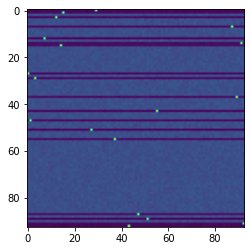

In [14]:
plt.imshow(logits_maleable)

In [15]:
# Set the model to evaluation mode
bigram_architecture.eval()

# this is the flag
text = ""

# turn off grandient back propagation
prev_token = random.choice(vocabulary)

while len(text) < 50:
    with torch.inference_mode():
        input_tensor = torch.LongTensor([[vocabulary.index(prev_token)]])
        output = bigram_architecture(input_tensor)
        logits = output.squeeze()
        probs = torch.softmax(logits, dim=-1)
        prev_token = random.choices(vocabulary, weights=probs.tolist())[0]
        text += prev_token


In [16]:
text.split("\n")[1]

'HTB{Pr0t3c7_L1fe}'